In [360]:
import numpy as np
import pandas as pd

import os
#os.sys.path
import sys
sys.path.append('../src')

from pathlib import Path

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
import code1_data as go

In [361]:
!tree ..

..
├── 0.jpg
├── README.md
├── demo
│   ├── 0.jpg
│   ├── demooo_01.jpg
│   ├── demooo_02.jpg
│   └── demooo_03.jpg
├── demo_faces
│   ├── 0_face1.jpg
│   ├── demooo_01_face1.jpg
│   ├── demooo_02_face1.jpg
│   └── demooo_03_face1.jpg
├── face_recog_library_demo
│   ├── demo_01.jpg
│   ├── demo_01_face1.jpg
│   ├── demo_01_face2.jpg
│   ├── demo_01_face3.jpg
│   ├── demo_01_face4.jpg
│   ├── demo_01_face5.jpg
│   ├── demo_01_face6.jpg
│   ├── demo_02.jpg
│   ├── demo_02_face1.jpg
│   ├── demo_02_face2.jpg
│   ├── demo_02_face3.jpg
│   ├── demo_02_face4.jpg
│   ├── demo_03.jpg
│   ├── demo_03_face1.jpg
│   ├── demo_03_face2.jpg
│   ├── demo_04.jpg
│   ├── demo_04_face1.jpg
│   ├── demo_05.jpg
│   ├── demo_05_face1.jpg
│   ├── demo_05_face2.jpg
│   ├── demo_05_face3.jpg
│   ├── demo_05_face4.jpg
│   ├── demo_06.jpg
│   ├── demo_06_face1.jpg
│   ├── demo_06_face2.jpg
│   ├── demo_07.jpg
│   ├── demo_07_face1.jpg
│   ├── demo_07_face2.jpg
│   ├── demo_08.jpg
│   ├── demo_08_face1.jpg
│   ├

In [362]:
inp1_path = Path.home()/'Iron'/'inp1'

train_path = inp1_path/'train'
testvalidation_path = inp1_path/'test_validation'

fer_csv = inp1_path/'Fer.csv'
train_csv = train_path/'Training_Data.csv'
test_csv = testvalidation_path/'Testing_Data.csv'
validation_csv = testvalidation_path/'Validation_Data.csv'


In [363]:
df_fer = pd.read_csv(fer_csv,encoding = "ISO-8859-1")
df_train = pd.read_csv(train_csv,encoding = "ISO-8859-1")
df_test = pd.read_csv(test_csv,encoding = "ISO-8859-1")
df_validation = pd.read_csv(validation_csv,encoding = "ISO-8859-1")

In [364]:
dfs = [df_fer,df_train,df_test,df_validation]

In [365]:
df_fer.name = 'df_fer'
df_train.name = 'df_train'
df_test.name = 'df_test'
df_validation.name = 'df_validation'


In [366]:
stupid_csv = testvalidation_path/'Stupid_Data.csv'
df_stupid = pd.read_csv(stupid_csv,encoding = "ISO-8859-1")
df_stupid.name = 'df_stupid'

In [367]:
df_stupid.head(2)

,emotion,pixels,Usage
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest


In [368]:
df_stupid.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [369]:
def translate_number2emotion(x):
    columns = {'angry':1, 'contempt':2, 'disgust':3, 'fear':4, 'happy':5, 'sadness':6, 'surprise':7} 
    for k,v in columns.items():
        if x == v:
            return k

In [370]:
df_stupid['emotion_name']=df_stupid['emotion'].apply(translate_number2emotion)

In [359]:
df_stupid.head()

,emotion,pixels,Usage,emotion_name
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest,None
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest,happy
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest,sadness
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest,fear
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest,contempt


In [352]:
num = 1
with open(stupid_csv) as f:
    csvr = csv.reader(f)
    header = next(csvr)
    print(header)
    for i, (label, pixel) in enumerate(csvr):
        pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
        subfolder = os.path.join(save_path, label)
        if not os.path.exists(subfolder):
            os.makedirs(subfolder)
        im = Image.fromarray(pixel).convert('L')
        image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
        im.save(image_name)

['emotion', 'pixels', 'Usage']


ValueError: too many values to unpack (expected 2)

In [350]:
import csv

with open(stupid_csv) as f:
    csvr = csv.reader(f)
    header = next(csvr)
    for i, (label, pixel) in enumerate(csvr):
        pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
        subfolder = os.path.join(save_path, label)
        if not os.path.exists(subfolder):
            os.makedirs(subfolder)
        im = Image.fromarray(pixel).convert('L')
        image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
        im.save(image_name)

ValueError: too many values to unpack (expected 2)

In [308]:
for dataframe in dfs:
    print(f"---> {dataframe.name} <---")
    print(dataframe.shape)
    print(list(dataframe.columns))
    display(dataframe.head(3))
    print("\n")

---> df_fer <---
(35887, 3)
['emotion', 'pixels', 'Usage']


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training




---> df_train <---
(28709, 3)
['emotion', 'pixels', 'Usage']


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training




---> df_test <---
(3589, 3)
['emotion', 'pixels', 'Usage']


,emotion,pixels,Usage
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest




---> df_validation <---
(3589, 3)
['emotion', 'pixels', 'Usage']


,emotion,pixels,Usage
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest


In [354]:
df_stupid.emotion.unique()

array([0, 5, 6, 4, 2, 3, 1])

In [85]:
ccc = Path.home()/'Pictures'/'Cristina_copy copy.jpg'

In [86]:
from PIL import Image

In [87]:
ccc_pil_img = Image.open(str(ccc))

In [88]:
ccc_pil_img.size

(5184, 3456)

In [84]:
ccc_pil_img.show()

In [93]:
train_path

PosixPath('/Users/cris/Iron/inp1/train')

In [107]:
face_cascade = cv2.CascadeClassifier('../src/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../src/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('../src/haarcascade_smile.xml')

In [127]:
ferdi = train_path/'0.jpg'
strferdi=str(ferdi)

In [256]:
def transfImag(path):
    print ('transforming image from {}'.format(path))

    input_img=cv2.imread(path)
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(input_img, 1.25, 6)
    x,y,w,h = faces[0]
    img_data= input_img[y:y+h,x:x+w]
    img_data=cv2.resize(img_data,(48,48))
    
    img_data = np.stack(img_data)
    img_data = img_data / 255.0
    
    return img_data

transforming image from /Users/cris/Iron/inp1/train/0.jpg


PIC.size:  2304
PIC.shape:  (48, 48)


PIC[0].shape: (48,)


PIC[0]:  [0.21176471 0.27058824 0.3254902  0.25098039 0.21176471 0.20392157
 0.25098039 0.35686275 0.51372549 0.65882353 0.74901961 0.76078431
 0.78823529 0.80784314 0.81960784 0.82745098 0.83921569 0.84705882
 0.85098039 0.85098039 0.84705882 0.84705882 0.84705882 0.85098039
 0.84705882 0.84313725 0.83137255 0.82352941 0.81176471 0.79607843
 0.77254902 0.74117647 0.71372549 0.67843137 0.61176471 0.55294118
 0.50588235 0.4627451  0.41960784 0.37647059 0.35294118 0.3372549
 0.32941176 0.34901961 0.34901961 0.32156863 0.32941176 0.34117647]


PIC1[0].shape:  (48, 48, 1)


PIC1[0]:  [[[0.21176471]
  [0.27058824]
  [0.3254902 ]
  ...
  [0.32156863]
  [0.32941176]
  [0.34117647]]

 [[0.22745098]
  [0.27058824]
  [0.31372549]
  ...
  [0.35294118]
  [0.34901961]
  [0.35294118]]

 [[0.24313725]
  [0.2745098 ]
  [0.29803922]
  ...
  [0.38431373]
  [0.37647059]
  [0.36862745]]

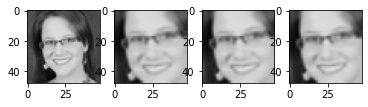

In [255]:
PIC = transfImag(str(ferdi))

print("\n")
print('PIC.size: ',PIC.size)
print('PIC.shape: ',PIC.shape)
print("\n")
print('PIC[0].shape:',PIC[0].shape)
print("\n")
print('PIC[0]: ',PIC[0])
print("\n")
PIC1 = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
print('PIC1[0].shape: ', PIC1[0].shape)
print("\n")
print('PIC1[0]: ',PIC1[0])

input_img=cv2.imread(str(ferdi))

plt.subplot(141)
plt.imshow(input_img) # original pic
plt.subplot(142)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
plt.subplot(143)
plt.imshow(Image.fromarray(PIC1.squeeze()*255)) # transformed pic
plt.subplot(144)
plt.imshow(Image.fromarray(PIC1[0].squeeze()*255)) # transformed pic

In [257]:
PIC1.shape

(1, 48, 48, 1)

In [ ]:
input_img=cv2.imread(str(ferdi)) # DUPLICADO!!  equiv ---> input_img1

plt.subplot(131)
plt.imshow(input_img1)
plt.subplot(132)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
plt.subplot(133)
plt.imshow(Image.fromarray(PIC.squeeze()*400)) # transformed pic

In [235]:
input_img1 = cv2.imread(str(ferdi))
input_img2 = cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(input_img2, 1.25, 6)
x,y,w,h = faces[0]

img_data1 = input_img2 [y:y+h,x:x+w]
img_data2 = cv2.resize (img_data1,(48,48))

img_data3 = np.stack(img_data2) # DUPLICADO!! equiv ---> img_data2

img_data4 = img_data2 / 255.0
img_data5 = img_data3 / 255.0 # no usar, es del duplicado anterior




El modelo necesita de input lo siguiente, equiv a PIC1: 
(1, 48, 48, 1) 2304
input_img:  (48, 48, 3) 6912


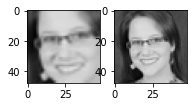

In [265]:
plt.subplot(141)
plt.imshow(Image.fromarray(PIC1.squeeze()*255)) # transformed pic
plt.subplot(142)
plt.imshow(Image.fromarray(input_img)) # transformed pic
print("\n")
print("El modelo necesita de input lo siguiente, equiv a PIC1: ")
print(PIC1.shape, PIC1.size)
print("input_img: ", input_img.shape, input_img.size)

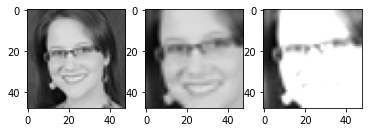

In [214]:
input_img=cv2.imread(str(ferdi)) # DUPLICADO!!  equiv ---> input_img1

plt.subplot(131)
plt.imshow(input_img1)
plt.subplot(132)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
plt.subplot(133)
plt.imshow(Image.fromarray(PIC.squeeze()*400)) # transformed pic

In [239]:
type(input_img1)

numpy.ndarray

In [237]:
type(PIC)

numpy.ndarray

In [232]:
img_data4[0]

array([0.21176471, 0.27058824, 0.3254902 , 0.25098039, 0.21176471,
       0.20392157, 0.25098039, 0.35686275, 0.51372549, 0.65882353,
       0.74901961, 0.76078431, 0.78823529, 0.80784314, 0.81960784,
       0.82745098, 0.83921569, 0.84705882, 0.85098039, 0.85098039,
       0.84705882, 0.84705882, 0.84705882, 0.85098039, 0.84705882,
       0.84313725, 0.83137255, 0.82352941, 0.81176471, 0.79607843,
       0.77254902, 0.74117647, 0.71372549, 0.67843137, 0.61176471,
       0.55294118, 0.50588235, 0.4627451 , 0.41960784, 0.37647059,
       0.35294118, 0.3372549 , 0.32941176, 0.34901961, 0.34901961,
       0.32156863, 0.32941176, 0.34117647])

In [233]:
img_data5[0]

array([0.21176471, 0.27058824, 0.3254902 , 0.25098039, 0.21176471,
       0.20392157, 0.25098039, 0.35686275, 0.51372549, 0.65882353,
       0.74901961, 0.76078431, 0.78823529, 0.80784314, 0.81960784,
       0.82745098, 0.83921569, 0.84705882, 0.85098039, 0.85098039,
       0.84705882, 0.84705882, 0.84705882, 0.85098039, 0.84705882,
       0.84313725, 0.83137255, 0.82352941, 0.81176471, 0.79607843,
       0.77254902, 0.74117647, 0.71372549, 0.67843137, 0.61176471,
       0.55294118, 0.50588235, 0.4627451 , 0.41960784, 0.37647059,
       0.35294118, 0.3372549 , 0.32941176, 0.34901961, 0.34901961,
       0.32156863, 0.32941176, 0.34117647])

In [234]:
PIC[0]

array([0.21176471, 0.27058824, 0.3254902 , 0.25098039, 0.21176471,
       0.20392157, 0.25098039, 0.35686275, 0.51372549, 0.65882353,
       0.74901961, 0.76078431, 0.78823529, 0.80784314, 0.81960784,
       0.82745098, 0.83921569, 0.84705882, 0.85098039, 0.85098039,
       0.84705882, 0.84705882, 0.84705882, 0.85098039, 0.84705882,
       0.84313725, 0.83137255, 0.82352941, 0.81176471, 0.79607843,
       0.77254902, 0.74117647, 0.71372549, 0.67843137, 0.61176471,
       0.55294118, 0.50588235, 0.4627451 , 0.41960784, 0.37647059,
       0.35294118, 0.3372549 , 0.32941176, 0.34901961, 0.34901961,
       0.32156863, 0.32941176, 0.34117647])

In [209]:
PIC.squeeze()[0]*255

array([ 54.,  69.,  83.,  64.,  54.,  52.,  64.,  91., 131., 168., 191.,
       194., 201., 206., 209., 211., 214., 216., 217., 217., 216., 216.,
       216., 217., 216., 215., 212., 210., 207., 203., 197., 189., 182.,
       173., 156., 141., 129., 118., 107.,  96.,  90.,  86.,  84.,  89.,
        89.,  82.,  84.,  87.])

transforming image from /Users/cris/Iron/inp1/train/0.jpg
[0.21176471 0.27058824 0.3254902  0.25098039 0.21176471 0.20392157
 0.25098039 0.35686275 0.51372549 0.65882353 0.74901961 0.76078431
 0.78823529 0.80784314 0.81960784 0.82745098 0.83921569 0.84705882
 0.85098039 0.85098039 0.84705882 0.84705882 0.84705882 0.85098039
 0.84705882 0.84313725 0.83137255 0.82352941 0.81176471 0.79607843
 0.77254902 0.74117647 0.71372549 0.67843137 0.61176471 0.55294118
 0.50588235 0.4627451  0.41960784 0.37647059 0.35294118 0.3372549
 0.32941176 0.34901961 0.34901961 0.32156863 0.32941176 0.34117647]
[0.21176471 0.27058824 0.3254902  0.25098039 0.21176471 0.20392157
 0.25098039 0.35686275 0.51372549 0.65882353 0.74901961 0.76078431
 0.78823529 0.80784314 0.81960784 0.82745098 0.83921569 0.84705882
 0.85098039 0.85098039 0.84705882 0.84705882 0.84705882 0.85098039
 0.84705882 0.84313725 0.83137255 0.82352941 0.81176471 0.79607843
 0.77254902 0.74117647 0.71372549 0.67843137 0.61176471 0.55294118
 0.5

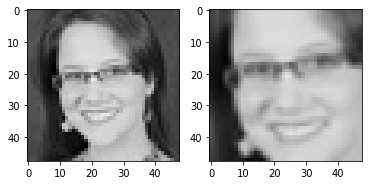

In [243]:
PIC = transfImag(str(ferdi)) # transform pic
input_img=cv2.imread(str(ferdi)) # get the array of the original pic

plt.subplot(121)
plt.imshow(input_img) # original pic
plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
print(PIC[0])
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
print(PIC.shape)

In [206]:
print('input_img1.size: ',input_img1.size)
print('input_img1.shape:',input_img1.shape)
#print('input_img1[0]:',"\n",input_img1[0])
print("\n")
print('input_img2.size: ',input_img2.size)
print('input_img2.shape:',input_img2.shape)
#print('input_img2[0]:',"\n",input_img2[0])
print("\n")
print('img_data1.size: ',img_data1.size)
print('img_data1.shape:',img_data1.shape)
print('img_data1[0]:',"\n",img_data1[0])
print("\n")
print('img_data2.size: ',img_data2.size)
print('img_data2.shape:',img_data2.shape)
print('img_data2[0]:',"\n",img_data2[0])
print("\n")
print('img_data3.size: ',img_data3.size)
print('img_data3.shape:',img_data3.shape)
print('img_data3[0]:',"\n",img_data3[0])
print("\n")
print('img_data4.size: ',img_data4.size)
print('img_data4.shape:',img_data4.shape)
print("\n")
print('img_data4[0]:',"\n",img_data4[0])
print("\n")
print('img_data4.squeeze()*255:',"\n",img_data4.squeeze()*255)
print("\n")
print('img_data4.squeeze()[0]*255:',"\n",img_data4.squeeze()[0]*255)
print("\n")
print('PIC.size: ',PIC.size)
print('PIC.shape: ',PIC.shape)
print("\n")
print('PIC.squeeze()*255',"\n",PIC.squeeze()*255)
print("\n")
print('PIC.squeeze()[0]*255',"\n",PIC.squeeze()[0]*255)


input_img1.size:  6912
input_img1.shape: (48, 48, 3)


input_img2.size:  2304
input_img2.shape: (48, 48)


img_data1.size:  961
img_data1.shape: (31, 31)
img_data1[0]: 
 [ 54  86  57  51  70 132 189 195 205 210 213 217 217 216 216 217 215 211
 207 200 187 177 150 130 113  96  87  84  92  81  87]


img_data2.size:  2304
img_data2.shape: (48, 48)
img_data2[0]: 
 [ 54  69  83  64  54  52  64  91 131 168 191 194 201 206 209 211 214 216
 217 217 216 216 216 217 216 215 212 210 207 203 197 189 182 173 156 141
 129 118 107  96  90  86  84  89  89  82  84  87]


img_data3.size:  2304
img_data3.shape: (48, 48)
img_data3[0]: 
 [ 54  69  83  64  54  52  64  91 131 168 191 194 201 206 209 211 214 216
 217 217 216 216 216 217 216 215 212 210 207 203 197 189 182 173 156 141
 129 118 107  96  90  86  84  89  89  82  84  87]


img_data4.size:  2304
img_data4.shape: (48, 48)


img_data4[0]: 
 [0.21176471 0.27058824 0.3254902  0.25098039 0.21176471 0.20392157
 0.25098039 0.35686275 0.51372549 0.65882353

In [133]:
PIC = transfImag(str(ferdi))
print('PIC.size: ',PIC.size)
print('PIC.shape: ',PIC.shape)

transforming image from /Users/cris/Iron/inp1/train/0.jpg
PIC.size:  2304
PIC.shape:  (48, 48)


transforming image from /Users/cris/Iron/inp1/train/0.jpg
<class 'numpy.ndarray'>
(1, 48, 48, 1)


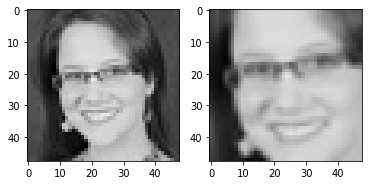

In [125]:

PIC = transfImag(str(ferdi)) # transform pic
print(type(PIC))

input_img=cv2.imread(str(ferdi)) # get the array of the original pic

plt.subplot(121)
plt.imshow(input_img) # original pic

plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic

PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
print(PIC.shape)

In [95]:
ferdi_pil_img = Image.open(str(ferdi))

In [96]:
ferdi_pil_img.size

(48, 48)

In [97]:
ferdi_pil_img.show()

In [89]:
ccc2 = ccc_pil_img.resize((48,48))

In [90]:
ccc2.size

(48, 48)

In [91]:
type(ccc2)

PIL.Image.Image

In [92]:
ccc2.show()

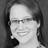

In [99]:
display(ferdi_pil_img)

In [101]:
ferdiarray = np.asarray(ferdi_pil_img)

In [106]:
print(ferdiarray.size, ferdiarray.shape)

2304 (48, 48)


In [103]:
cccarray225 = np.asarray(ccc2)
print(cccarray225.size, cccarray225.shape)
cccarray225

6912 (48, 48, 3)


array([[[57, 71, 51],
        [59, 73, 54],
        [61, 76, 56],
        ...,
        [54, 68, 49],
        [54, 68, 48],
        [53, 67, 48]],

       [[56, 70, 52],
        [58, 73, 54],
        [61, 76, 56],
        ...,
        [54, 68, 49],
        [55, 69, 50],
        [55, 69, 49]],

       [[55, 70, 50],
        [59, 73, 54],
        [60, 75, 55],
        ...,
        [54, 68, 49],
        [53, 67, 48],
        [50, 64, 44]],

       ...,

       [[35, 52, 32],
        [36, 54, 34],
        [35, 52, 35],
        ...,
        [30, 43, 28],
        [33, 47, 30],
        [33, 46, 29]],

       [[35, 51, 32],
        [35, 53, 33],
        [35, 51, 33],
        ...,
        [28, 42, 27],
        [33, 46, 29],
        [33, 46, 29]],

       [[34, 50, 31],
        [34, 52, 32],
        [35, 49, 32],
        ...,
        [28, 41, 27],
        [32, 45, 29],
        [32, 45, 29]]], dtype=uint8)

In [104]:
cccarray = np.asarray(ccc2)
print(cccarray.size, cccarray.shape)
cccarray

6912 (48, 48, 3)


array([[[57, 71, 51],
        [59, 73, 54],
        [61, 76, 56],
        ...,
        [54, 68, 49],
        [54, 68, 48],
        [53, 67, 48]],

       [[56, 70, 52],
        [58, 73, 54],
        [61, 76, 56],
        ...,
        [54, 68, 49],
        [55, 69, 50],
        [55, 69, 49]],

       [[55, 70, 50],
        [59, 73, 54],
        [60, 75, 55],
        ...,
        [54, 68, 49],
        [53, 67, 48],
        [50, 64, 44]],

       ...,

       [[35, 52, 32],
        [36, 54, 34],
        [35, 52, 35],
        ...,
        [30, 43, 28],
        [33, 47, 30],
        [33, 46, 29]],

       [[35, 51, 32],
        [35, 53, 33],
        [35, 51, 33],
        ...,
        [28, 42, 27],
        [33, 46, 29],
        [33, 46, 29]],

       [[34, 50, 31],
        [34, 52, 32],
        [35, 49, 32],
        ...,
        [28, 41, 27],
        [32, 45, 29],
        [32, 45, 29]]], dtype=uint8)

In [67]:
cccarray225 = np.asarray(ccc2)/255

In [ ]:
def modify_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    face=np.asarray(convert_from)/255
    return face

In [ ]:
from IPython.display import display
def modify_size(img):
    size=(48,48)
    convert_from = img.resize(size)
    print(type(convert_from))
    display(convert_from)
    convert_from.save(str(ccc.parent/'convert_from1.jpg'))
    print(convert_from.size)
    face=np.asarray(convert_from)/255
    pil_face = Image.fromarray(face)
    print(type(face))
    print(type(pil_face))
    print(face.shape)
    #display(pil_face)
    print(pil_face.size)
    return face